In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

In [25]:
import os
print(os.getcwd())
df = pd.read_csv("D:\CA-Makeen\week9\MLFiles\Polynomial_Ridge_Lesso\Real_estate.csv")

D:\CA-Makeen\week9\learning_regression\my_virtual_env


<>:3: SyntaxWarning: invalid escape sequence '\C'
<>:3: SyntaxWarning: invalid escape sequence '\C'
C:\Users\hal3r\AppData\Local\Temp\ipykernel_8412\1519840137.py:3: SyntaxWarning: invalid escape sequence '\C'
  df = pd.read_csv("D:\CA-Makeen\week9\MLFiles\Polynomial_Ridge_Lesso\Real_estate.csv")


In [26]:
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [27]:
X = df.drop(columns = ['Y house price of unit area', 'X1 transaction date', 'X2 house age'])
Y = df['Y house price of unit area']
x_train, x_test,y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)


In [28]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
lin_reg_y_pred = lin_reg.predict(x_test)
mse = mean_squared_error(y_test, lin_reg_y_pred)
print(mse)

66.92704954054938


In [30]:
coef_df = pd.DataFrame({
    "Feature": x_train.columns,
    "Coefficient": lin_reg.coef_
})
print(coef_df)

                                  Feature  Coefficient
0                                      No    -0.007104
1  X3 distance to the nearest MRT station    -0.004780
2         X4 number of convenience stores     0.995931
3                             X5 latitude   217.991432
4                            X6 longitude    -9.893568


In [31]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(x_train, y_train)
y_pred_lasso = lasso.predict(x_test)
mse = mean_squared_error(y_test, y_pred_lasso)
print(mse)

70.97870464284352


In [32]:
coef_df = pd.DataFrame({
    "Feature": x_train.columns,
    "Coefficient": lasso.coef_
})
print(coef_df)

                                  Feature  Coefficient
0                                      No    -0.007978
1  X3 distance to the nearest MRT station    -0.006042
2         X4 number of convenience stores     0.943694
3                             X5 latitude     0.000000
4                            X6 longitude    -0.000000


In [33]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(x_train, y_train)
y_pred_ridge = ridge.predict(x_test)
mse = mean_squared_error(y_test, y_pred_ridge)
print(mse)

69.88706396636678


In [34]:
coef_df = pd.DataFrame({
    "Feature": x_train.columns,
    "Coefficient": ridge.coef_
})
print(coef_df)

                                  Feature  Coefficient
0                                      No    -0.007886
1  X3 distance to the nearest MRT station    -0.005748
2         X4 number of convenience stores     1.120977
3                             X5 latitude     7.175499
4                            X6 longitude    -0.934689


### Comparing the coefficients of the Lasso and Ridge Regularization models

C:\Users\hal3r\AppData\Local\Temp\ipykernel_8412\3574242321.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['Linear', 'Lasso', 'Ridge'])


[Text(0, 0, 'Linear'), Text(1, 0, 'Lasso'), Text(2, 0, 'Ridge')]

<Figure size 3000x600 with 0 Axes>

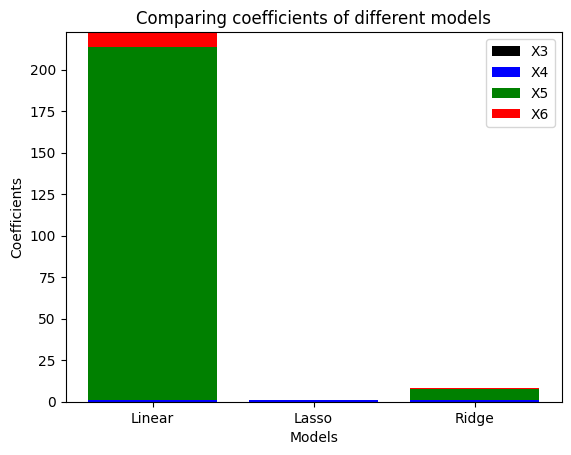

In [35]:
plt.figure(figsize=(30,6))
x = ['Linear', 'Lasso', 'Ridge']
y1 = np.array([-0.004709, -0.005994, 0.005700])
y2 = np.array([1.007691, 0.958896,  1.135925])
y3 = np.array([221.632669, 0.000000, 7.304642])
y4 = np.array([-8.841321, -0.000000, -0.915969])
fig, axes = plt.subplots(ncols=1, nrows=1)
plt.bar(x, y1, color = 'black')
plt.bar(x, y2, bottom=y1, color='b')
plt.bar(x, y3, bottom=y1+y2, color='g')
plt.bar(x, y4, bottom=y1+y2+y3, color='r')
plt.xlabel("Models")
plt.ylabel("Coefficients")
plt.legend(["X3", "X4", "X5", "X6"])
plt.title("Comparing coefficients of different models")
axes.set_xticklabels(['Linear', 'Lasso', 'Ridge'])

Inspecting the coefficients, we can see that Lasso and Ridge Regression had shrunk the coefficients, and thus the coefficients are close to zero. On the contrary, Linear Regression still has a substantial value of the coefficient for the X5 column.